# Imports

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from scipy import stats

#helpers
%matplotlib inline

In [ ]:
#importing the demographic data file
data=pd.read_csv('Demographic_Data_Cleaned.csv')

# Preprocessing

In [ ]:
# Check the first 5 rows of the data frame
data.head()

in-store_num  region_num TransactionType RegionName  Age AgeGroup  \
0             0           2          online      South   37    35-50   
1             0           2          online      South   35    35-50   
2             1           4        in-store       West   45    35-50   
3             1           3        in-store       East   46    35-50   
4             1           1        in-store      North   33    18-34   

   AgeGroupIndex  ItemsPerPurchase AmountGroup  AmountGroupIndex  \
0              2                 4       5-285                 1   
1              2                 2       5-285                 1   
2              2                 3   1234-3000                 4   
3              2                 3    583-1233                 3   
4              1                 4   1234-3000                 4   

   AmountPerPurchase  AmountPerItem  
0             281.03          70.26  
1             219.51         109.76  
2            1525.70         508.57  
3             715.25         238.42  
4            1937.50         484.38

In [ ]:
# Show the number of values and data type for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79979 entries, 0 to 79978
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   in-store_num       79979 non-null  int64  
 1   region_num         79979 non-null  int64  
 2   TransactionType    79979 non-null  object 
 3   RegionName         79979 non-null  object 
 4   Age                79979 non-null  int64  
 5   AgeGroup           79979 non-null  object 
 6   AgeGroupIndex      79979 non-null  int64  
 7   ItemsPerPurchase   79979 non-null  int64  
 8   AmountGroup        79979 non-null  object 
 9   AmountGroupIndex   79979 non-null  int64  
 10  AmountPerPurchase  79979 non-null  float64
 11  AmountPerItem      79979 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 7.3+ MB


In [ ]:
# Check the column names
data.columns

Index(['in-store_num', 'region_num', 'TransactionType', 'RegionName', 'Age',
       'AgeGroup', 'AgeGroupIndex', 'ItemsPerPurchase', 'AmountGroup',
       'AmountGroupIndex', 'AmountPerPurchase', 'AmountPerItem'],
      dtype='object')

In [ ]:
# basic statistics for each column of the data
data.describe()

in-store_num    region_num           Age  AgeGroupIndex  \
count  79979.000000  79979.000000  79979.000000   79979.000000   
mean       0.500006      2.674915     45.758512       2.206342   
std        0.500003      1.126642     15.715158       0.980516   
min        0.000000      1.000000     18.000000       1.000000   
25%        0.000000      2.000000     33.000000       1.000000   
50%        1.000000      3.000000     45.000000       2.000000   
75%        1.000000      4.000000     56.000000       3.000000   
max        1.000000      4.000000     85.000000       4.000000   

       ItemsPerPurchase  AmountGroupIndex  AmountPerPurchase  AmountPerItem  
count      79979.000000      79979.000000       79979.000000   79979.000000  
mean           4.505133          2.498543         835.825727     256.721691  
std            2.061250          1.118806         721.263650     331.701050  
min            1.000000          1.000000           5.004700       0.660000  
25%            3.000000          1.000000         285.120000      63.490000  
50%            4.000000          2.000000         582.140000     146.090000  
75%            6.000000          3.000000        1233.400000     317.500000  
max            8.000000          4.000000        3000.000000    2998.600000

In [ ]:
# Count the unique values for each column
data.nunique()

in-store_num             2
region_num               4
TransactionType          2
RegionName               4
Age                     68
AgeGroup                 4
AgeGroupIndex            4
ItemsPerPurchase         8
AmountGroup              4
AmountGroupIndex         4
AmountPerPurchase    56112
AmountPerItem        41057
dtype: int64

In [ ]:
# Number of transactions, in-store vs online
data.groupby('TransactionType')['TransactionType'].count()

TransactionType
in-store    39990
online      39989
Name: TransactionType, dtype: int64

In [ ]:
# Number of transactions, by region
data.groupby('RegionName')['RegionName'].count()

RegionName
East     18000
North    15997
South    19994
West     25988
Name: RegionName, dtype: int64

**Initial Analysis Summary:**

* There are 79,979 unique observations.
* All columns supplied are integer values, except for the amount column which is a floating point decimal.

* TransactionType: Purchases made in-store or online
  * in-store purchases (39,989 values)
  * online purchases (39,990 values)

* RegionName: The sales region where the transaction took place
  * North (15,997 values)
  * South (19,994 values)
  * East (18,000 values)
  * West (25,988 values)

* Age: The age of the customer
  * 68 unique values from 18 to 85 years
  * Mean age is 45.8 years
  * Standard deviation is 15.7 years

* AgeGroup:
  * NEED TO DEFINE THIS ONE TO USE
  * 18-32
  * 33-44
  * 45-55
  * 56-85

* ItemsPerPurchase: The number of items purchased in the transaction
  * 8 values from 1 to 8 items
  * Mean is 4.5 items
  * Standard deviation is 2.1 items

* AmountGroup:
  * 5-285
  * 286-582
  * 583-1233
  * 1234-3000

* AmountPerPurchase: The total value, in dollars, purchased in the transaction
  * 56,112 unique values from 5.00 to 3,000
  * Mean is 835.92
  * Max is 3000.00

* AmountPerItem: The AmountPerPurchase divided by the ItemsPerPurchase


# Do Customers in different regions spend more per transaction?

In [ ]:
# Mean of amount spent per transaction by region
data.groupby('RegionName')['AmountPerPurchase'].mean()

RegionName
East      917.969637
North     744.990939
South     252.097741
West     1283.938357
Name: AmountPerPurchase, dtype: float64

It would appear that customers in region 4 spend more per transaction, on average, while customers in region 2 spend much less.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


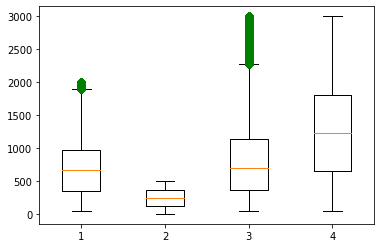

In [ ]:
# Prepare boxplot of amounts spent per region
R1 = data.loc[data.loc[:,'RegionName']=='North']
R1 = R1['AmountPerPurchase'].apply(float)

R2 = data.loc[data.loc[:,'RegionName']=='South']
R2 = R2['AmountPerPurchase'].apply(float)

R3 = data.loc[data.loc[:,'RegionName']=='East']
R3 = R3['AmountPerPurchase'].apply(float)

R4 = data.loc[data.loc[:,'RegionName']=='West']
R4 = R4['AmountPerPurchase'].apply(float)

plt.boxplot([R1,R2,R3,R4],0,'gD')
plt.show()

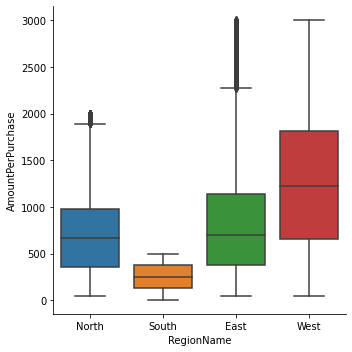

In [ ]:
# box plot showing the plot of amount for each count of items purchased
sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='box', order=['North','South','East','West'] )

Again, it appears that customers in region 4 spend more per transaction on average. The interquartile range for region 4 is for the most part higher than the mean of each of the other individual regions. The interquartile range for region 2 is lower than the interquartile ranges of each of the other individual regions, so there is a big difference between spending patterns of regions 2 and 4. Regions 1 and 3 are more similar to each other in regard to the mean, but region 3 has a larger interquartile range and a much higher maximum transaction amount.

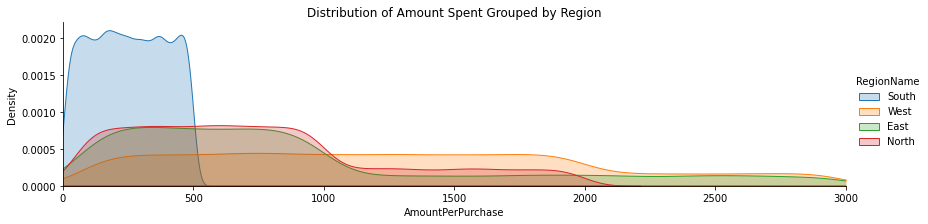

In [ ]:
#plot showing distribution of amount spent grouped by region
fig = sns.FacetGrid(data, hue='RegionName', aspect = 4)
fig.map(sns.kdeplot,'AmountPerPurchase',shade=True)
oldest=data['AmountPerPurchase'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Amount Spent Grouped by Region')
fig.add_legend()

In this plot, we can visually see the big differences between region 2 (South) and 4 (West). The density of amounts for the South region is concentrated under $500, while the West region's amounts are spread much more broadly. The North and East regions appear to have amounts concentrated under \$1000, but the East region has a much broader range between the high and low amounts.

In [ ]:
#crosstab showing the average amount spent per region in the provided dataset
pd.crosstab(index=data.RegionName, columns=[data.TransactionType], values = data.AmountPerPurchase.round(), aggfunc = 'mean', margins=True, margins_name='Total')

TransactionType     in-store       online        Total
RegionName                                            
East              520.941449  1541.715755   917.965944
North             744.992186          NaN   744.992186
South                    NaN   252.095629   252.095629
West             1024.242650  1543.635986  1283.939318
Total             774.105626   897.545775   835.824929

In [ ]:
#crosstab showing the total amount spent per region in the provided dataset
pd.crosstab(index=data.RegionName, columns=[data.TransactionType], values = data.AmountPerPurchase.round(), aggfunc = sum, margins=True, margins_name='Total')

TransactionType    in-store      online       Total
RegionName                                         
East              5729835.0  10793552.0  16523387.0
North            11917640.0         NaN  11917640.0
South                   NaN   5040400.0   5040400.0
West             13309009.0  20058006.0  33367015.0
Total            30956484.0  35891958.0  66848442.0

In this table, we see that the North region does not have online transactions, and the South region does not have in-store transactions. The total of all transactions is $66,848,442, with more spent on online transactions than in-store. The West region has the highest total transaction total, followed by the East, North, and South. Both East and West have significantly higher amounts spent online vs in-store.

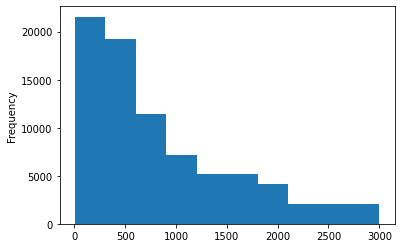

In [ ]:
# histogram showing the frequency of the different amounts for transactions
data['AmountPerPurchase'].apply(float).plot.hist()

The spending is different between regions, but why?

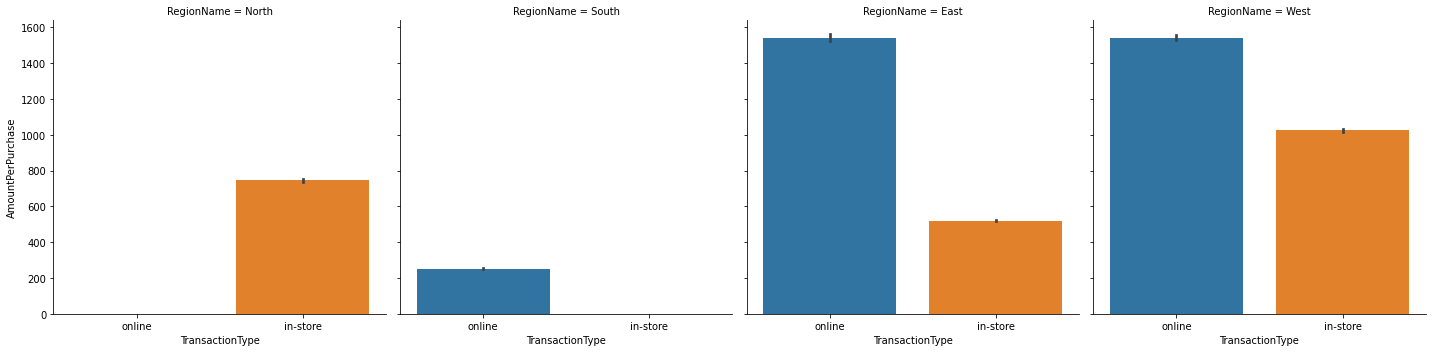

In [ ]:
#Plot showing the total value of transactions by online/in-store for each region
sns.catplot(x='TransactionType', y='AmountPerPurchase', data=data, kind='bar', col='RegionName', 
            col_order=['North','South','East','West'] )

We see that the North and South regions don't have both types of transactions. That could account for part of the difference. The East and West have about the same total online sales, but the East has fewer in-store sales.

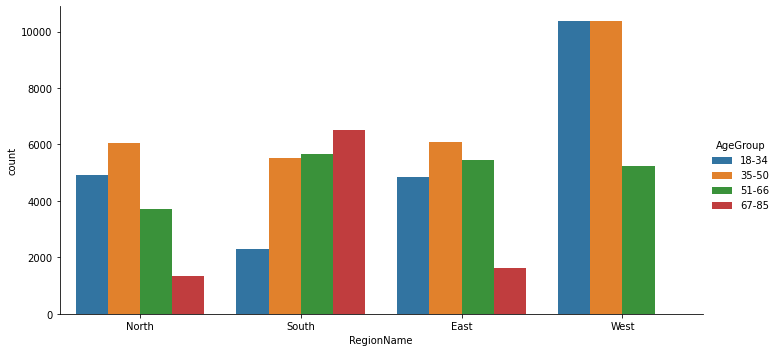

In [ ]:
#factorplot of transaction count grouped by region and age range.
sns.catplot(x='RegionName', data=data, kind='count', hue='AgeGroup', order=['North','South','East','West'],
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

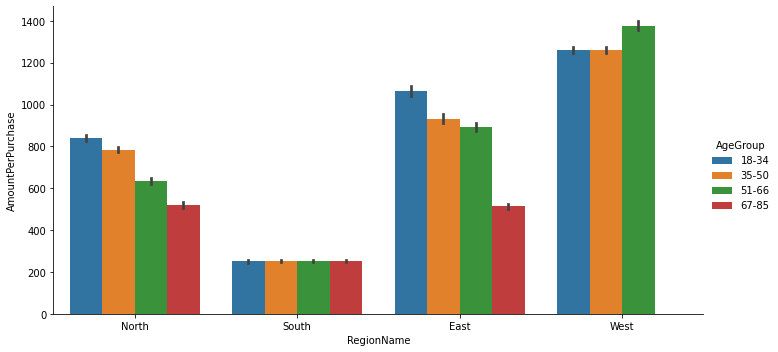

In [ ]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='bar', hue='AgeGroup', order=['North','South','East','West'],
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)


These two graphs show that the different regions have different age profiles. Also, the different age groups have different spending patterns.

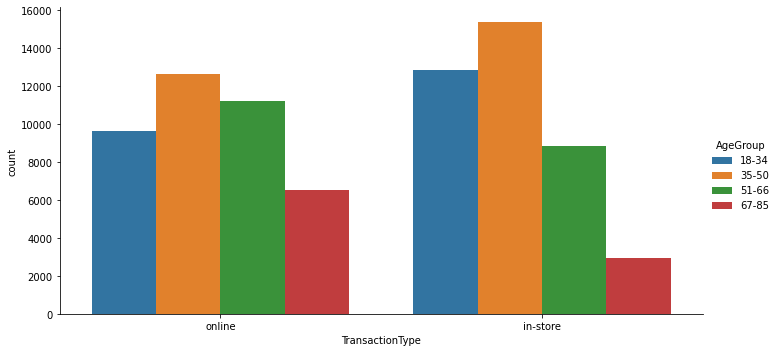

In [ ]:

#factorplot of transaction count grouped by transaction type and age range.
sns.catplot(x='TransactionType', data=data, kind='count', hue='AgeGroup', 
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

In this graph, we see the online transactions are evenly split among the 30-39, 40-49, and 50-59 age groups, while in-store sales are greatest in the 40-49 age group, followed by the 30-39 age group, thent the 20-29 age group.

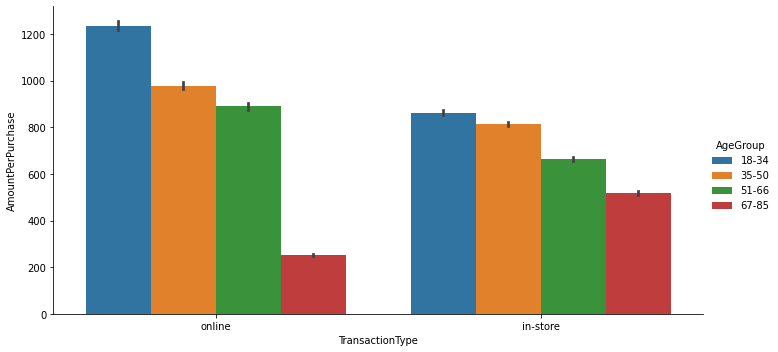

In [ ]:
#factorplot of transaction count grouped by region and age range.
sns.catplot(x='TransactionType', y='AmountPerPurchase', data=data, kind='bar', hue='AgeGroup', 
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

In this graph, we see that for both online and in-store transactions, the amount spent declines with age.

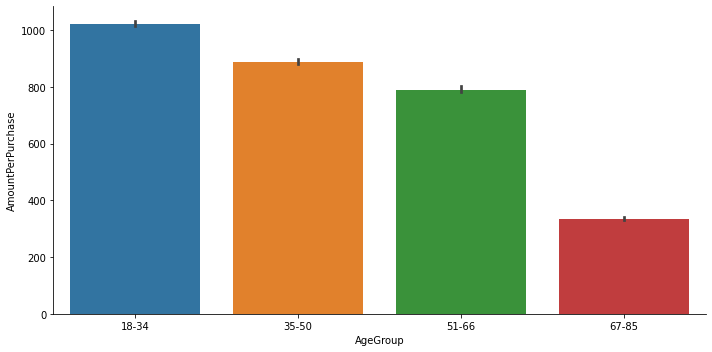

In [ ]:
#factorplot of transactions amounts grouped by age range.
sns.catplot(x='AgeGroup', y='AmountPerPurchase', data=data, kind='bar', 
            order=['18-34','35-50','51-66','67-85'], aspect=2)

For all transactions, it appears that younger customers spend more.

# Is there a relationship between the number of items purchased and the amount spent?

In [ ]:
# correlation matrix
data.corr()

in-store_num  region_num       Age  AgeGroupIndex  \
in-store_num           1.000000   -0.133171 -0.178180      -0.161989   
region_num            -0.133171    1.000000 -0.235370      -0.215392   
Age                   -0.178180   -0.235370  1.000000       0.955242   
AgeGroupIndex         -0.161989   -0.215392  0.955242       1.000000   
ItemsPerPurchase      -0.003897   -0.001904  0.000657       0.000271   
AmountGroupIndex       0.086125    0.374382 -0.311260      -0.284779   
AmountPerPurchase     -0.085573    0.403486 -0.282033      -0.257142   
AmountPerItem         -0.054597    0.269473 -0.187250      -0.169467   

                   ItemsPerPurchase  AmountGroupIndex  AmountPerPurchase  \
in-store_num              -0.003897          0.086125          -0.085573   
region_num                -0.001904          0.374382           0.403486   
Age                        0.000657         -0.311260          -0.282033   
AgeGroupIndex              0.000271         -0.284779          -0.257142   
ItemsPerPurchase           1.000000          0.000010           0.000384   
AmountGroupIndex           0.000010          1.000000           0.886375   
AmountPerPurchase          0.000384          0.886375           1.000000   
AmountPerItem             -0.469113          0.591212           0.666868   

                   AmountPerItem  
in-store_num           -0.054597  
region_num              0.269473  
Age                    -0.187250  
AgeGroupIndex          -0.169467  
ItemsPerPurchase       -0.469113  
AmountGroupIndex        0.591212  
AmountPerPurchase       0.666868  
AmountPerItem           1.000000

In [ ]:

# covariance matrix
data.cov()

in-store_num  region_num          Age  AgeGroupIndex  \
in-store_num           0.250003   -0.075019    -1.400071      -0.079417   
region_num            -0.075019    1.269321    -4.167305      -0.237942   
Age                   -1.400071   -4.167305   246.966189      14.719289   
AgeGroupIndex         -0.079417   -0.237942    14.719289       0.961411   
ItemsPerPurchase      -0.004017   -0.004421     0.021270       0.000548   
AmountGroupIndex       0.048179    0.471906    -5.472632      -0.312404   
AmountPerPurchase    -30.860425  327.874873 -3196.782841    -181.853827   
AmountPerItem         -9.055034  100.704285  -976.086565     -55.117177   

                   ItemsPerPurchase  AmountGroupIndex  AmountPerPurchase  \
in-store_num              -0.004017          0.048179         -30.860425   
region_num                -0.004421          0.471906         327.874873   
Age                        0.021270         -5.472632       -3196.782841   
AgeGroupIndex              0.000548         -0.312404        -181.853827   
ItemsPerPurchase           4.248751          0.000023           0.570791   
AmountGroupIndex           0.000023          1.251726         715.263463   
AmountPerPurchase          0.570791        715.263463      520221.252295   
AmountPerItem           -320.741257        219.404313      159544.065150   

                   AmountPerItem  
in-store_num           -9.055034  
region_num            100.704285  
Age                  -976.086565  
AgeGroupIndex         -55.117177  
ItemsPerPurchase     -320.741257  
AmountGroupIndex      219.404313  
AmountPerPurchase  159544.065150  
AmountPerItem      110025.586244

There is both a positive correlation between items and amount, and a positive covariance between items and amount, indicating that a relationship likely exists between the number of items purchased and the amount spent.

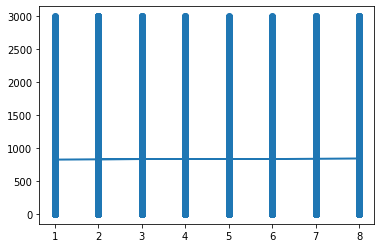

In [ ]:
# creating a scatter plot of 10000 observations from the dataframe
df_sample = data.sample(50000)

x = df_sample['ItemsPerPurchase']
y = df_sample['AmountPerPurchase']

plt.scatter(x,y,marker='o')

# creating m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# scatter plot with linear regression line
plt.plot(x, m*x+b)

In [ ]:
m

2.3064419612753184

Although there is a positive covariance, and the slope is positive, the increase in the total amount as items purchased is really insignificant.

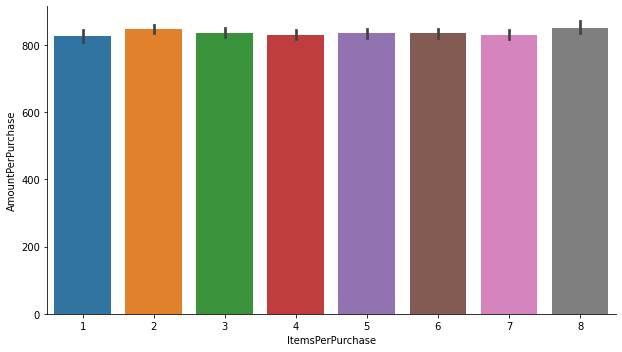

In [ ]:
# catplot showing the mean amount for each count of items
g = sns.catplot(x='ItemsPerPurchase', y='AmountPerPurchase', data=data, kind='bar', aspect = 1.75)

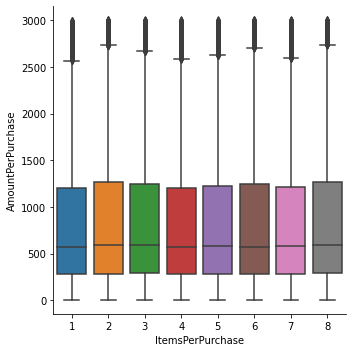

In [ ]:
# box plot showing the plot of amount for each count of items purchased
sns.catplot(x='ItemsPerPurchase', y='AmountPerPurchase', data=data, kind='box')

In both plots, we see the mean amount purchased per item purchased is about the same. The interquartile ranges for each item are similar as well. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Number of Items Purchased')

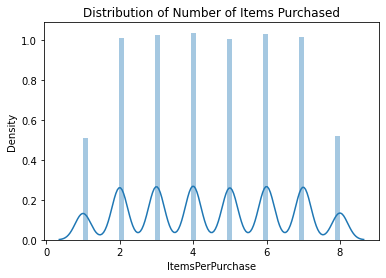

In [ ]:
items_dist = sns.distplot(data['ItemsPerPurchase'])
items_dist.set_title('Distribution of Number of Items Purchased')

The number of items purchased is spread pretty evenly from 2-6, lower for 1 and 8.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amount Purchased')

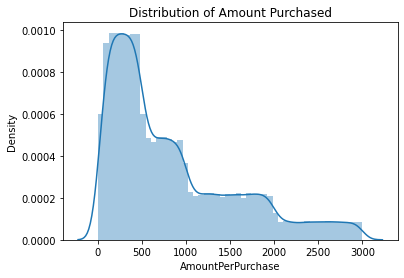

In [ ]:
amount_dist = sns.distplot(data['AmountPerPurchase'])
amount_dist.set_title('Distribution of Amount Purchased')

Transactions are most commonly under \\$500 total, followed by transactions under \\$1000, then under \\$2000

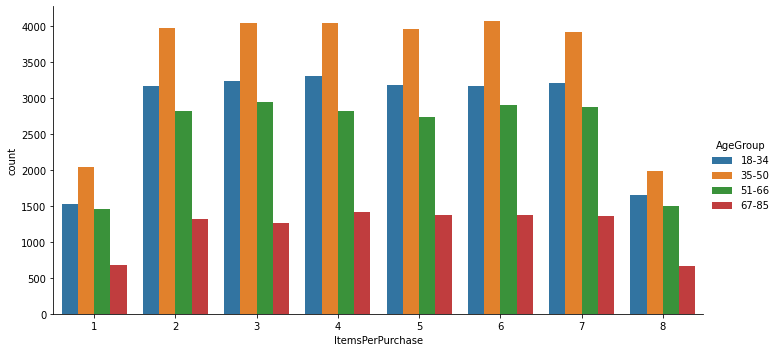

In [ ]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='ItemsPerPurchase', data=data, kind='count', hue='AgeGroup', order=range(1,9),
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

The age breakout per item purchased is similar for 2-7 items

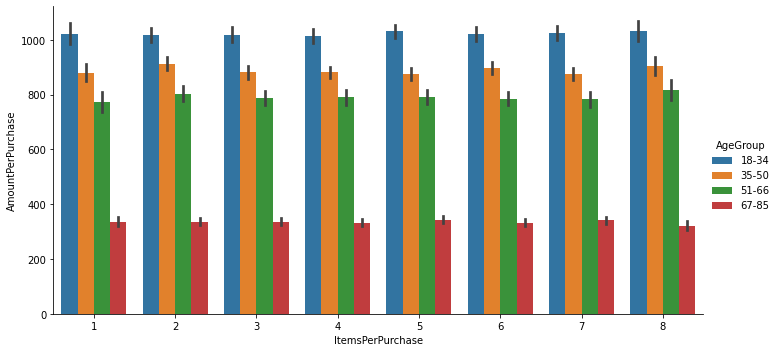

In [ ]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='ItemsPerPurchase', y='AmountPerPurchase', data=data, kind='bar', hue='AgeGroup', order=range(1,9),
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

The age breakout for the total amount purchased per item is also very similar for all items.

# Task 1 Conclusion

Even though customers in different regions tend to spend different amounts, that likely is due to the difference in the transaction mixes per regon between online and in-store, along with the demographic differences in customer ages for each region.

There may be a very weak relationship between the number of items and total amount purchased, but it appears to be insignificant.

# Are there differences in the age of customers between regions?

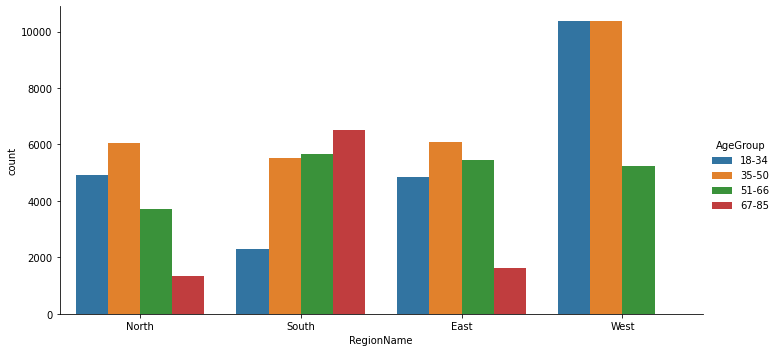

In [ ]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='RegionName', data=data, kind='count', hue='AgeGroup', order=['North','South','East','West'],
            hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

In the plot above, we see the age ranges of customers for each region. It does appear that there are differences in the age of customers between regions.

# New Slides for Task 3 count/amount by region name and transaction types

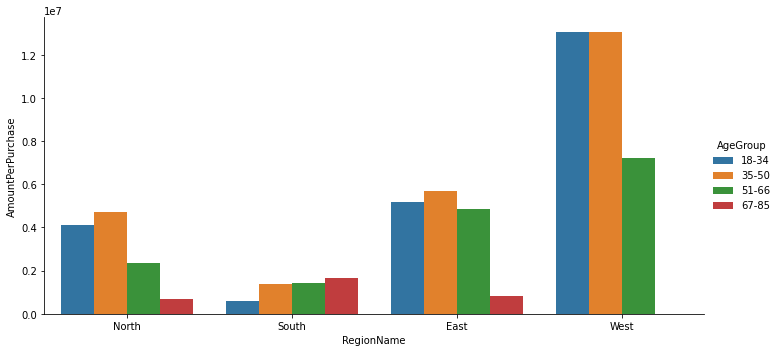

In [ ]:
#factorplot of transaction amounts grouped by region and age range.
sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='bar', estimator=sum, ci=None, hue='AgeGroup', 
            order=['North','South','East','West'], hue_order=['18-34','35-50','51-66','67-85'], aspect=2)

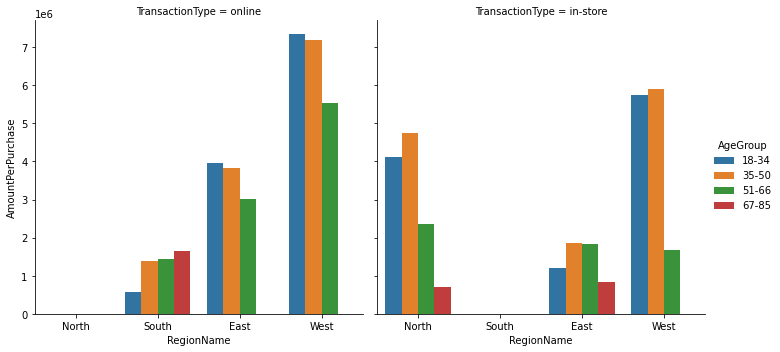

In [ ]:
#factorplot of transaction amounts grouped by region and age range.
sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='bar', estimator=sum, ci=None, hue='AgeGroup', 
            col='TransactionType', order=['North','South','East','West'], col_order=['online','in-store'],
            hue_order=['18-34','35-50','51-66','67-85'])

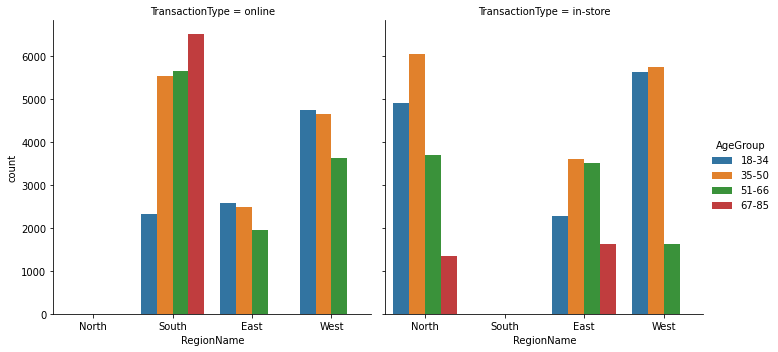

In [ ]:
#Plot showing the total count of transactions by online/in-store for each region
sns.catplot(x='RegionName', data=data, kind='count', hue='AgeGroup', 
            col='TransactionType', order=['North','South','East','West'], col_order=['online','in-store'],
            hue_order=['18-34','35-50','51-66','67-85'])

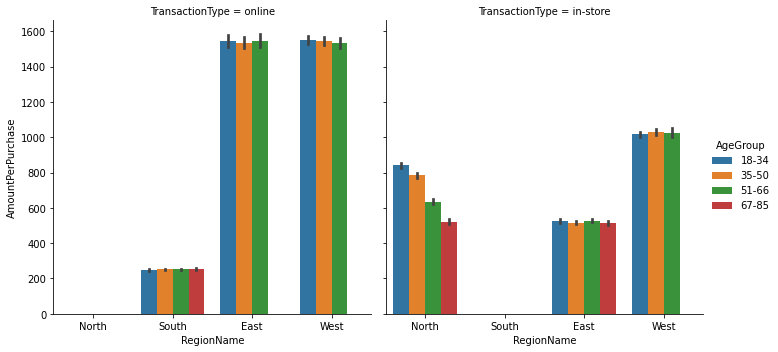

In [ ]:
#Plot showing the avg value of transactions by online/in-store for each region
sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='bar', hue='AgeGroup', 
            col='TransactionType', order=['North','South','East','West'], col_order=['online','in-store'],
            hue_order=['18-34','35-50','51-66','67-85'])

# New AmountPerItem Slides

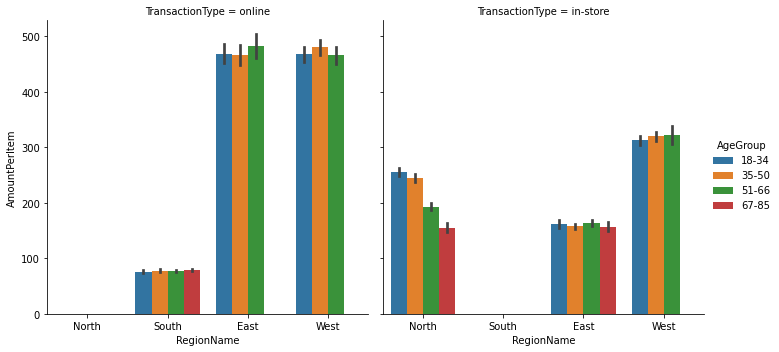

In [ ]:
#Plot showing the avg amt per item by online/in-store for each region
sns.catplot(x='RegionName', y='AmountPerItem', data=data, kind='bar', hue='AgeGroup', 
            col='TransactionType', order=['North','South','East','West'], col_order=['online','in-store'],
            hue_order=['18-34','35-50','51-66','67-85'])

In [ ]:
#crosstab showing the average amount spent per region in the provided dataset
pd.crosstab(index=data.RegionName, columns=[data.TransactionType, data.AgeGroup], values = data.AmountPerItem, aggfunc = 'mean')

TransactionType    in-store                                          online  \
AgeGroup              18-34       35-50       51-66       67-85       18-34   
RegionName                                                                    
East             161.789110  157.511829  164.237276  157.258100  469.218342   
North            255.473552  245.253041  192.579749  155.452414         NaN   
South                   NaN         NaN         NaN         NaN   76.152836   
West             312.440866  319.818166  322.303229         NaN  468.712632   

TransactionType                                     
AgeGroup              35-50       51-66      67-85  
RegionName                                          
East             466.519490  481.994805        NaN  
North                   NaN         NaN        NaN  
South             77.884436   77.453269  78.440203  
West             480.170271  465.691474        NaN

In [ ]:
#crosstab showing the total items purchased per region in the provided dataset
pd.crosstab(index=data.RegionName, columns=[data.TransactionType, data.AgeGroup], values = data.ItemsPerPurchase, aggfunc = 'sum', margins=True, margins_name='Total')

TransactionType in-store                              online           \
AgeGroup           18-34    35-50    51-66    67-85    18-34    35-50   
RegionName                                                              
East             10155.0  16231.0  15733.0   7258.0  11516.0  11270.0   
North            22323.0  26957.0  16733.0   6138.0      NaN      NaN   
South                NaN      NaN      NaN      NaN  10389.0  24914.0   
West             25468.0  25637.0   7206.0      NaN  21551.0  20822.0   
Total            57946.0  68825.0  39672.0  13396.0  43456.0  57006.0   

TransactionType                     Total  
AgeGroup           51-66    67-85          
RegionName                                 
East              8729.0      NaN   80892  
North                NaN      NaN   72151  
South            25611.0  29315.0   90229  
West             16360.0      NaN  117044  
Total            50700.0  29315.0  360316

In [ ]:
#crosstab showing the total amount purchased per region in the provided dataset
pd.crosstab(index=data.RegionName, columns=[data.TransactionType, data.AgeGroup], values = data.AmountPerPurchase.round(), aggfunc = 'sum', margins=True, margins_name='Total')

TransactionType    in-store                                        online  \
AgeGroup              18-34       35-50      51-66      67-85       18-34   
RegionName                                                                  
East              1196015.0   1861504.0  1843076.0   829240.0   3965223.0   
North             4128802.0   4737433.0  2355082.0   696323.0         NaN   
South                   NaN         NaN        NaN        NaN    579710.0   
West              5734923.0   5905068.0  1669018.0        NaN   7336306.0   
Total            11059740.0  12504005.0  5867176.0  1525563.0  11881239.0   

TransactionType                                         Total  
AgeGroup              35-50      51-66      67-85              
RegionName                                                     
East              3822424.0  3005905.0        NaN  16523387.0  
North                   NaN        NaN        NaN  11917640.0  
South             1387074.0  1427055.0  1646561.0   5040400.0  
West              7175857.0  5545843.0        NaN  33367015.0  
Total            12385355.0  9978803.0  1646561.0  66848442.0

# IMPUTING MISSING DATA USING MEAN()

*This method was used to impute missing data*

[Impute missing data values in Python - 3 Easy Ways! - Ask Python](https://www.askpython.com/python/examples/impute-missing-data-values#:~:text=%20Impute%20missing%20data%20values%20by%20MEAN%20,have%20used%20mean%20%28%29%20function%20to...%20More%20)

In [ ]:

#impute the missing values using mean()
#import the above crosstab into dataframe mdf
mdf = pd.crosstab(index=data.RegionName, columns=[data.TransactionType, data.AgeGroup], values = data.AmountPerPurchase.round(), aggfunc = 'sum')

In [ ]:
#flatten the multi index header
mdf.columns = [f'{i}{j}' for i, j in mdf.columns]

In [ ]:
#show all of the NULL values in the original crosstab
mdf_train = mdf
print ("count of NULL values before imputation")
mdf_train.isnull().sum()

count of NULL values before imputation


in-store18-34    1
in-store35-50    1
in-store51-66    1
in-store67-85    2
online18-34      1
online35-50      1
online51-66      1
online67-85      3
dtype: int64

In [ ]:
#impute the missing values using mean() for each column
missing_col = ['in-store18-34']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()
missing_col = ['in-store35-50']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()
missing_col = ['in-store51-66']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()
missing_col = ['in-store67-85']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()

missing_col = ['online18-34']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()
missing_col = ['online35-50']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()
missing_col = ['online51-66']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()
missing_col = ['online67-85']
for i in missing_col:
  mdf_train.loc[mdf_train.loc[:,i].isnull(),i]=mdf_train.loc[:,i].mean()

In [ ]:
#show the missing values after imputation: prove this worked
mdf_train = mdf
print ("count of NULL values after imputation")
mdf_train.isnull().sum()

count of NULL values after imputation


in-store18-34    0
in-store35-50    0
in-store51-66    0
in-store67-85    0
online18-34      0
online35-50      0
online51-66      0
online67-85      0
dtype: int64

In [ ]:
#brute force unfortunately
#build a data frame data2 from an array nandata consisting of the imputed values

nandata = {'in-store_num': ['1','1','1','1','0','0','0','0','1','0','0','0'],
        'region_num': [2,2,2,2,1,1,1,1,2,1,1,1],
        'TransactionType': ['in-store','in-store','in-store','in-store','online','online','online','online','in-store','online','online','online'],
        'RegionName':['South','South','South','South','North','North','North','North','West','East','North','West'],
        'Age':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
        'AgeGroup':['18-34','35-50','51-66','67-85','18-34','35-50','51-66','67-85','67-85','67-85','67-85','67-85'],
        'AgeGroupIndex':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
        'ItemsPerPurchase':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
        'AmountGroup':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
        'AmountGroupIndex':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
        'AmountPerPurchase':[3686580.0,1387074.0,1955725.0,762781.5,3960413.0,4128452,3326268,1646561,762781.5,1646561.0,1646561.0,1646561.0],
        'AmountPerItem':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
        }

data2 = pd.DataFrame(nandata)
#show the new data frame
data2

in-store_num  region_num TransactionType RegionName  Age AgeGroup  \
0             1           2        in-store      South  NaN    18-34   
1             1           2        in-store      South  NaN    35-50   
2             1           2        in-store      South  NaN    51-66   
3             1           2        in-store      South  NaN    67-85   
4             0           1          online      North  NaN    18-34   
5             0           1          online      North  NaN    35-50   
6             0           1          online      North  NaN    51-66   
7             0           1          online      North  NaN    67-85   
8             1           2        in-store       West  NaN    67-85   
9             0           1          online       East  NaN    67-85   
10            0           1          online      North  NaN    67-85   
11            0           1          online       West  NaN    67-85   

   AgeGroupIndex ItemsPerPurchase AmountGroup AmountGroupIndex  \
0            NaN              NaN         NaN              NaN   
1            NaN              NaN         NaN              NaN   
2            NaN              NaN         NaN              NaN   
3            NaN              NaN         NaN              NaN   
4            NaN              NaN         NaN              NaN   
5            NaN              NaN         NaN              NaN   
6            NaN              NaN         NaN              NaN   
7            NaN              NaN         NaN              NaN   
8            NaN              NaN         NaN              NaN   
9            NaN              NaN         NaN              NaN   
10           NaN              NaN         NaN              NaN   
11           NaN              NaN         NaN              NaN   

    AmountPerPurchase AmountPerItem  
0           3686580.0           NaN  
1           1387074.0           NaN  
2           1955725.0           NaN  
3            762781.5           NaN  
4           3960413.0           NaN  
5           4128452.0           NaN  
6           3326268.0           NaN  
7           1646561.0           NaN  
8            762781.5           NaN  
9           1646561.0           NaN  
10          1646561.0           NaN  
11          1646561.0           NaN

In [ ]:
#build a new dataframe data3 concatenating the original data dataframe and data2 with the imputed values
data3 = pd.concat([data,data2])

In [ ]:
#crosstab showing the total items purchased per region in the provided dataset including imputed values
pd.crosstab(index=data2.RegionName, columns=[data2.TransactionType, data2.AgeGroup], values = data2.AmountPerPurchase, aggfunc = 'sum',margins=True, margins_name='Total')

TransactionType   in-store                                      online  \
AgeGroup             18-34      35-50      51-66      67-85      18-34   
RegionName                                                               
East                   NaN        NaN        NaN        NaN        NaN   
North                  NaN        NaN        NaN        NaN  3960413.0   
South            3686580.0  1387074.0  1955725.0   762781.5        NaN   
West                   NaN        NaN        NaN   762781.5        NaN   
Total            3686580.0  1387074.0  1955725.0  1525563.0  3960413.0   

TransactionType                                        Total  
AgeGroup             35-50      51-66      67-85              
RegionName                                                    
East                   NaN        NaN  1646561.0   1646561.0  
North            4128452.0  3326268.0  3293122.0  14708255.0  
South                  NaN        NaN        NaN   7792160.5  
West                   NaN        NaN  1646561.0   2409342.5  
Total            4128452.0  3326268.0  6586244.0  26556319.0

If all imputed values are included, the amount purchased would increase by 26,556,319. The North's imputed values for the missing online segment are 14,708,255 and the South's imputed values for the missing in-store segment are 7,792,160. West in-store 67-85 will add 762,781, and East and West online 67-85 will add 1,656,561 each.

In [ ]:
#crosstab showing the total items purchased per region in the provided dataset including imputed values
pd.crosstab(index=data3.RegionName, columns=[data3.TransactionType, data3.AgeGroup], values = data3.AmountPerPurchase, aggfunc = 'sum')

TransactionType     in-store                                        \
AgeGroup               18-34        35-50        51-66       67-85   
RegionName                                                           
East             1196029.081  1861518.622  1843114.085  829251.296   
North            4128796.980  4737423.021  2355078.493  696321.559   
South            3686580.000  1387074.000  1955725.000  762781.500   
West             5734929.523  5905062.242  1668990.875  762781.500   

TransactionType        online                                            
AgeGroup                18-34         35-50         51-66         67-85  
RegionName                                                               
East             3.965215e+06  3.822413e+06  3.005912e+06  1.646561e+06  
North            3.960413e+06  4.128452e+06  3.326268e+06  3.293122e+06  
South            5.797128e+05  1.387073e+06  1.427089e+06  1.646568e+06  
West             7.336301e+06  7.175861e+06  5.545845e+06  1.646561e+06

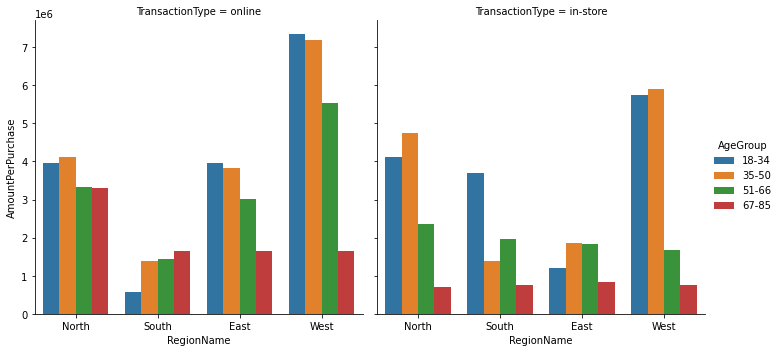

In [ ]:
#factorplot of transaction amounts grouped by region and age range. INCLUDING IMPUTED RESULTS
sns.catplot(x='RegionName', y='AmountPerPurchase', data=data3, kind='bar', estimator=sum, ci=None, hue='AgeGroup', 
            col='TransactionType', order=['North','South','East','West'], col_order=['online','in-store'],
            hue_order=['18-34','35-50','51-66','67-85'])

# So, what's missing?
1. The North region has no online sales
2. The South region has no in-person sales
3. The South region online sales are much less than East and West

# From Keegan

In [ ]:
Amount_So = data.groupby(['RegionName','AgeGroup','TransactionType']).agg({'AmountPerPurchase':['sum','count']})
Amount_So.columns = ['amountsum','amountcount']
Amount_So = Amount_So.reset_index()
print(Amount_So)

   RegionName AgeGroup TransactionType     amountsum  amountcount
0        East    18-34        in-store  1.196029e+06         2280
1        East    18-34          online  3.965215e+06         2569
2        East    35-50        in-store  1.861519e+06         3604
3        East    35-50          online  3.822413e+06         2488
4        East    51-66        in-store  1.843114e+06         3499
5        East    51-66          online  3.005912e+06         1944
6        East    67-85        in-store  8.292513e+05         1616
7       North    18-34        in-store  4.128797e+06         4913
8       North    35-50        in-store  4.737423e+06         6045
9       North    51-66        in-store  2.355078e+06         3705
10      North    67-85        in-store  6.963216e+05         1334
11      South    18-34          online  5.797128e+05         2313
12      South    35-50          online  1.387073e+06         5523
13      South    51-66          online  1.427089e+06         5657
14      So

Displaying values for amounts Agerange/region/in-store

In [ ]:
Amount_To = data.groupby(['RegionName','TransactionType']).agg({'AmountPerPurchase':['sum','count']})
Amount_To.columns = ['amountsum','amountcount']
Amount_To = Amount_To.reset_index()
print(Amount_To)

  RegionName TransactionType     amountsum  amountcount
0       East        in-store  5.729913e+06        10999
1       East          online  1.079354e+07         7001
2      North        in-store  1.191762e+07        15997
3      South          online  5.040442e+06        19994
4       West        in-store  1.330898e+07        12994
5       West          online  2.005801e+07        12994


Displaying total values for region and in-store

Utilizing the above, I was able to calculate the following potential revenues
- North online sales compared with West total online sales
- East oldest age group online sales based off of southern pattern
- West oldest age group online sales based off of southern pattern
- South in-store sales compared with West total in-store sales
- West oldest age group in-store sales compared with East pattern
-Total potential revenue

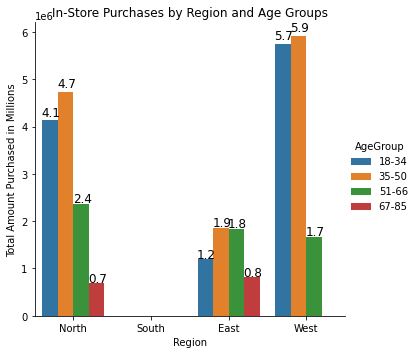

In [ ]:
g = sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='bar', estimator=sum, ci=None, hue='AgeGroup',
            col='TransactionType', order=['North','South','East','West'], col_order=['in-store'],
            hue_order=['18-34','35-50','51-66','67-85']).set(title="In-Store Purchases by Region and Age Groups")
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Amount Purchased in Millions', fontsize=10)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01,
            p.get_height() * 1.02,
           '{0:.1f}'.format(p.get_height()/1000000),   #Used to format it K representation
            color='black',
            rotation='horizontal',
            size='large')

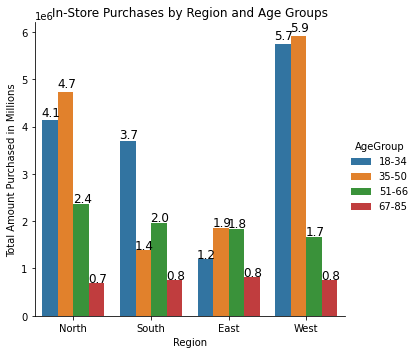

In [ ]:
g = sns.catplot(x='RegionName', y='AmountPerPurchase', data=data3, kind='bar', estimator=sum, ci=None, hue='AgeGroup',
            col='TransactionType', order=['North','South','East','West'], col_order=['in-store'],
            hue_order=['18-34','35-50','51-66','67-85']).set(title="In-Store Purchases by Region and Age Groups")
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Amount Purchased in Millions', fontsize=10)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01,
            p.get_height() * 1.02,
           '{0:.1f}'.format(p.get_height()/1000000),   #Used to format it K representation
            color='black',
            rotation='horizontal',
            size='large')

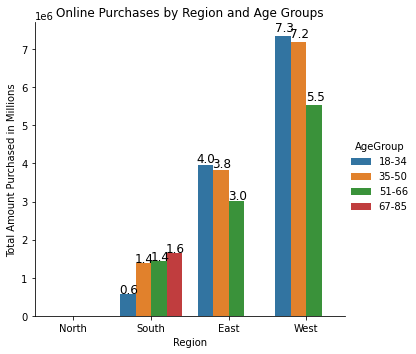

In [ ]:
g = sns.catplot(x='RegionName', y='AmountPerPurchase', data=data, kind='bar', estimator=sum, ci=None, hue='AgeGroup',
            col='TransactionType', order=['North','South','East','West'], col_order=['online'],
            hue_order=['18-34','35-50','51-66','67-85']).set(title="Online Purchases by Region and Age Groups")
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Amount Purchased in Millions', fontsize=10)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01,
            p.get_height() * 1.02,
           '{0:.1f}'.format(p.get_height()/1000000),   #Used to format it K representation
            color='black',
            rotation='horizontal',
            size='large')

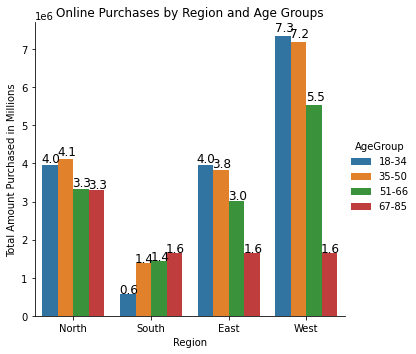

In [ ]:
g = sns.catplot(x='RegionName', y='AmountPerPurchase', data=data3, kind='bar', estimator=sum, ci=None, hue='AgeGroup',
            col='TransactionType', order=['North','South','East','West'], col_order=['online'],
            hue_order=['18-34','35-50','51-66','67-85']).set(title="Online Purchases by Region and Age Groups")
plt.xlabel('Region', fontsize=10)
plt.ylabel('Total Amount Purchased in Millions', fontsize=10)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.01,
            p.get_height() * 1.02,
           '{0:.1f}'.format(p.get_height()/1000000),   #Used to format it K representation
            color='black',
            rotation='horizontal',
            size='large')

The following are graphs in the slides

- Do customers in different regions spend more per transaction?
- Which regions spend the most/least?

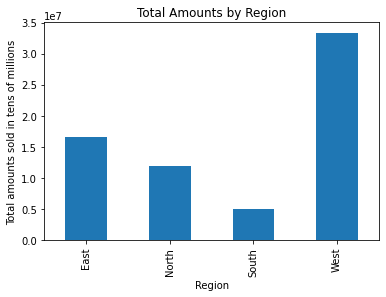

In [ ]:
Amount_sold= data.groupby('RegionName')['AmountPerPurchase'].sum()
Amount_sold.plot(title= 'Total Amounts by Region', kind= 'bar', ylabel= 'Total amounts sold in tens of millions',
                xlabel= 'Region')

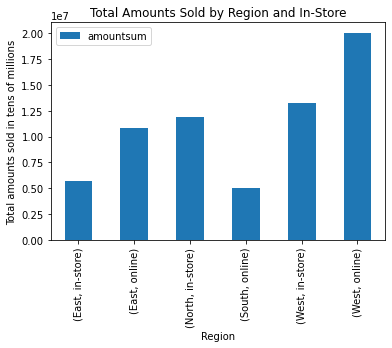

In [ ]:
Amount_To = data.groupby(['RegionName', 'TransactionType']).agg({'AmountPerPurchase':['sum']})
Amount_To.columns = ['amountsum']
Amount_To.plot(title= 'Total Amounts Sold by Region and In-Store', kind= 'bar', ylabel= 'Total amounts sold in tens of millions',
                xlabel= 'Region')

# If so, can we predict the age of a customer in a region based on other demographic data?

In [ ]:
#regional filtered data sets
North = data[data['region_num'] == 1]
South = data[data['region_num'] == 2]
East = data[data['region_num'] == 3]
West = data[data['region_num'] == 4]

In [ ]:
#features for each region
X = data[['in-store_num','region_num','ItemsPerPurchase','AmountGroupIndex']]

XN = North[['in-store_num','ItemsPerPurchase','AmountGroupIndex']]
XS = South[['in-store_num','ItemsPerPurchase','AmountGroupIndex']]
XE = East[['in-store_num','ItemsPerPurchase','AmountGroupIndex']]
XW = West[['in-store_num','ItemsPerPurchase','AmountGroupIndex']]

#dependent variables for each region
y = data['AgeGroup']

yn = North['AgeGroup']
ys = South['AgeGroup']
ye = East['AgeGroup']
yw = West['AgeGroup']

In [ ]:
#Train/Test Split for each region
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

XN_train, XN_test, yn_train, yn_test = train_test_split(XN, yn, test_size = .20, random_state = 123)
XS_train, XS_test, ys_train, ys_test = train_test_split(XS, ys, test_size = .20, random_state = 123)
XE_train, XE_test, ye_train, ye_test = train_test_split(XE, ye, test_size = .20, random_state = 123)
XW_train, XW_test, yw_train, yw_test = train_test_split(XW, yw, test_size = .20, random_state = 123)

In [ ]:
#Modeling (Classification) for each region
algo = DecisionTreeClassifier()

algon = DecisionTreeClassifier()
algos = DecisionTreeClassifier()
algoe = DecisionTreeClassifier()
algow = DecisionTreeClassifier()

model = algo.fit(X_train,y_train)

modeln = algon.fit(XN_train,yn_train)
models = algos.fit(XS_train,ys_train)
modele = algoe.fit(XE_train,ye_train)
modelw = algow.fit(XW_train,yw_train)

In [ ]:
#Predictions for each regional model
preds = model.predict(X_test)

predsn = modeln.predict(XN_test)
predss = models.predict(XS_test)
predse = modele.predict(XE_test)
predsw = modelw.predict(XW_test)

In [ ]:
#inputs and targets for regional model scores
input = data.drop(['AgeGroup','Age','RegionName','AmountPerPurchase','TransactionType','AmountGroup','ItemsPerPurchase','AgeGroupIndex'],axis='columns')

inputn = North.drop(['AgeGroup','Age','region_num','RegionName','AmountPerPurchase','TransactionType','AmountGroup','ItemsPerPurchase','AgeGroupIndex'],axis='columns')
inputs = South.drop(['AgeGroup','Age','region_num','RegionName','AmountPerPurchase','TransactionType','AmountGroup','ItemsPerPurchase','AgeGroupIndex'],axis='columns')
inpute = East.drop(['AgeGroup','Age','region_num','RegionName','AmountPerPurchase','TransactionType','AmountGroup','ItemsPerPurchase','AgeGroupIndex'],axis='columns')
inputw = West.drop(['AgeGroup','Age','region_num','RegionName','AmountPerPurchase','TransactionType','AmountGroup','ItemsPerPurchase','AgeGroupIndex'],axis='columns')

target = data['AgeGroup']

targetn = North['AgeGroup']
targets = South['AgeGroup']
targete = East['AgeGroup']
targetw = West['AgeGroup']

In [ ]:
print("Overall Classification")
print("")
print(classification_report(y_test,preds,zero_division=0))

s1 = 'Overall Region Score:' 
s2 = model.score(input,target)
print(s1, s2)
print("")

print("North Region Classification")
print("")
print(classification_report(yn_test,predsn,zero_division=0))

s1 = 'North Region Score:' 
s2 = modeln.score(inputn,targetn)
print(s1, s2)
print("")

print("South Region Classification")
print("")
print(classification_report(ys_test,predss,zero_division=0))

s1 = 'South Region Score:' 
s2 = models.score(inputs,targets)
print(s1, s2)
print("")

print("East Region Classification")
print("")
print(classification_report(ye_test,predse,zero_division=0))

s1 = 'East Region Score:' 
s2 = modele.score(inpute,targete)
print(s1, s2)
print("")

print("West Region Classification")
print("")
print(classification_report(yw_test,predsw,zero_division=0))

s1 = 'West Region Score:' 
s2 = modelw.score(inputw,targetw)
print(s1, s2)
print("")

Overall Classification

              precision    recall  f1-score   support

       18-34       0.38      0.35      0.36      4453
       35-50       0.38      0.45      0.41      5671
       51-66       0.31      0.09      0.14      3962
       67-85       0.32      0.68      0.44      1910

    accuracy                           0.36     15996
   macro avg       0.35      0.39      0.34     15996
weighted avg       0.36      0.36      0.33     15996

Overall Region Score: 0.3128196151489766

North Region Classification



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AmountPerItem
Feature names seen at fit time, yet now missing:
- ItemsPerPurchase

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

       18-34       0.40      0.14      0.21       984
       35-50       0.38      0.85      0.52      1259
       51-66       0.29      0.02      0.04       718
       67-85       0.00      0.00      0.00       239

    accuracy                           0.38      3200
   macro avg       0.27      0.25      0.19      3200
weighted avg       0.34      0.38      0.28      3200

North Region Score: 0.3787585172219791

South Region Classification

              precision    recall  f1-score   support

       18-34       0.00      0.00      0.00       437
       35-50       0.00      0.00      0.00      1100
       51-66       0.00      0.00      0.00      1170
       67-85       0.32      1.00      0.49      1292

    accuracy                           0.32      3999
   macro avg       0.08      0.25      0.12      3999
weighted avg       0.10      0.32      0.16      3999

South Region Score: 0.32514754426327896

East Region Classifi

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AmountPerItem
Feature names seen at fit time, yet now missing:
- ItemsPerPurchase

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AmountPerItem
Feature names seen at fit time, yet now missing:
- ItemsPerPurchase

  warnings.warn(message, FutureWarning)


              precision    recall  f1-score   support

       18-34       0.37      0.35      0.36       989
       35-50       0.33      0.46      0.38      1245
       51-66       0.29      0.27      0.28      1026
       67-85       0.00      0.00      0.00       340

    accuracy                           0.33      3600
   macro avg       0.25      0.27      0.26      3600
weighted avg       0.30      0.33      0.31      3600

East Region Score: 0.3455

West Region Classification

              precision    recall  f1-score   support

       18-34       0.38      0.54      0.45      2032
       35-50       0.41      0.45      0.43      2096
       51-66       0.00      0.00      0.00      1070

    accuracy                           0.39      5198
   macro avg       0.26      0.33      0.29      5198
weighted avg       0.31      0.39      0.35      5198



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AmountPerItem
Feature names seen at fit time, yet now missing:
- ItemsPerPurchase

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AmountPerItem
Feature names seen at fit time, yet now missing:
- ItemsPerPurchase

  warnings.warn(message, FutureWarning)


West Region Score: 0.40083884869939973



Overall (Decision Tree Classifier)


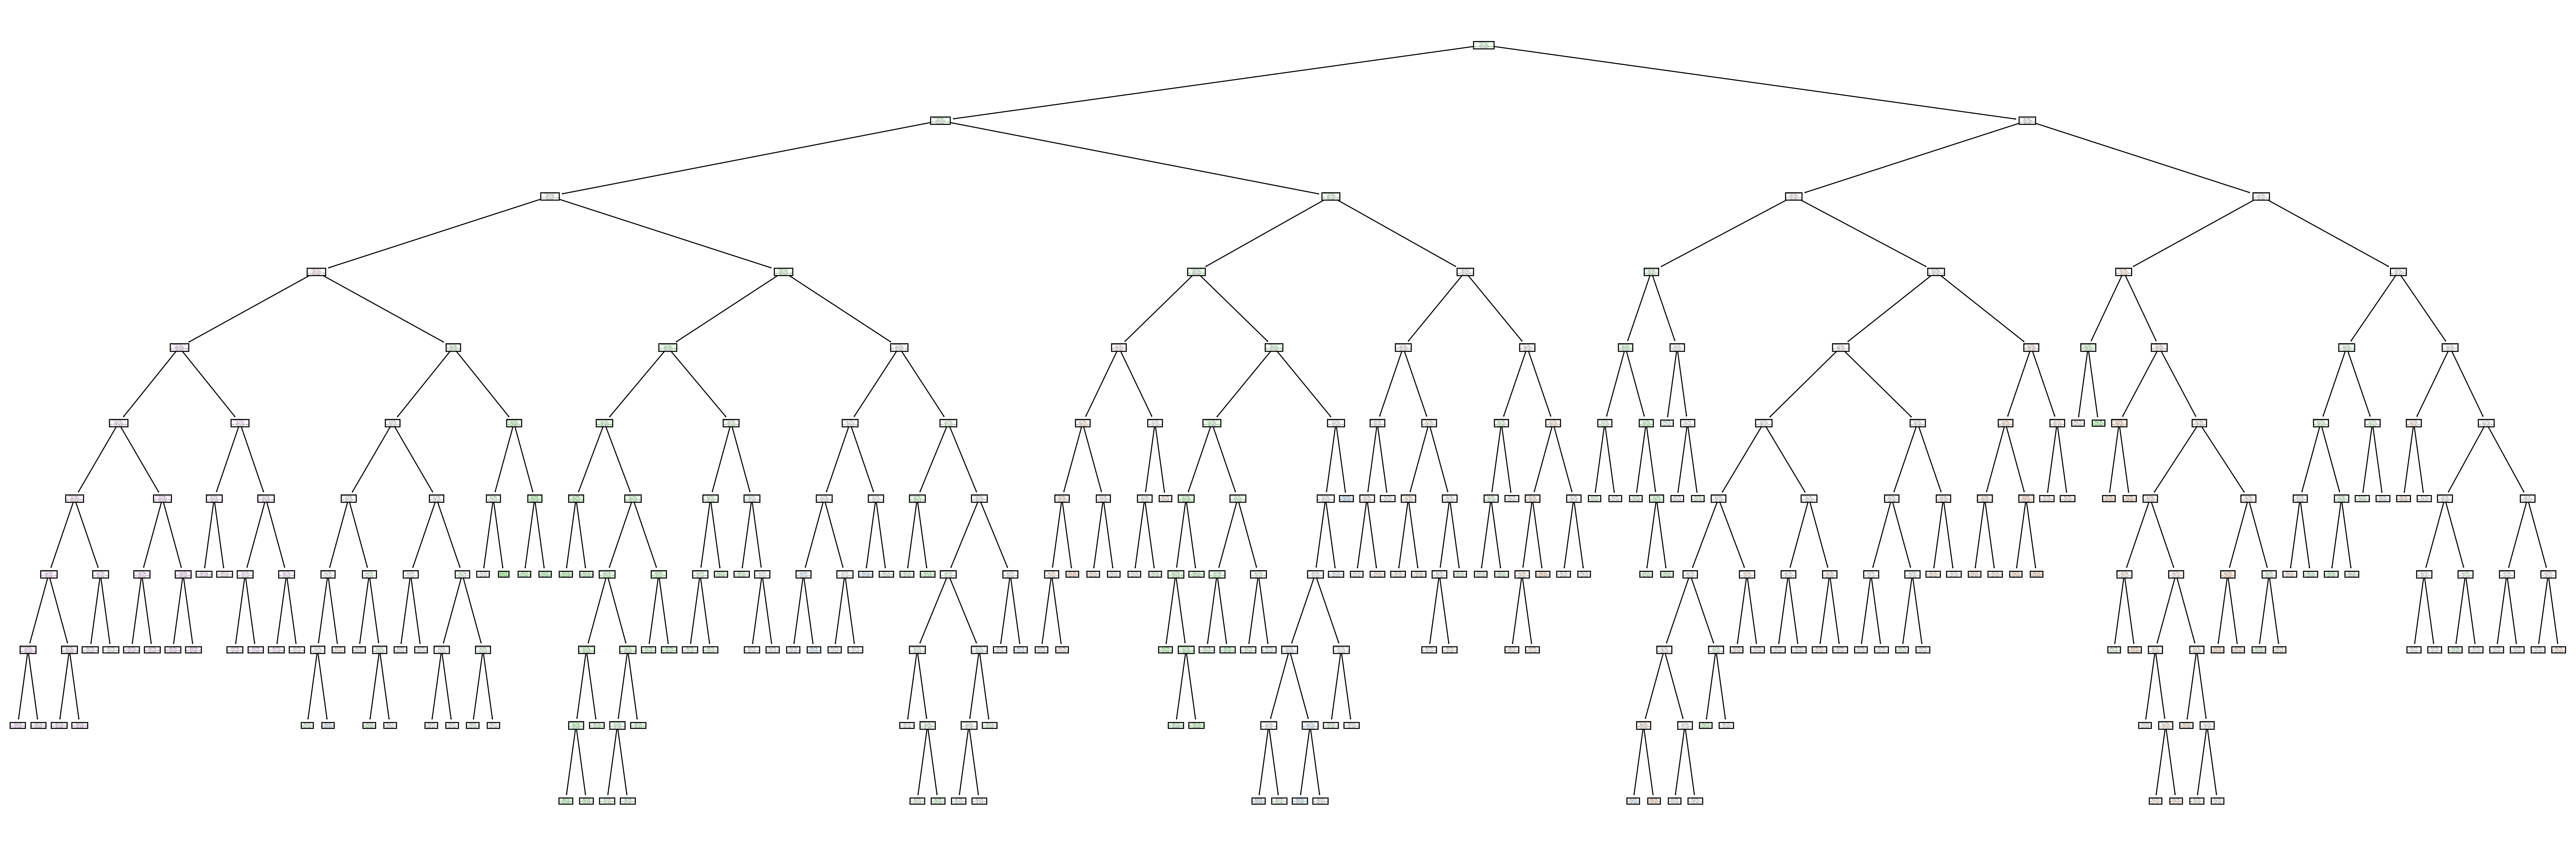

In [ ]:
print('Overall (Decision Tree Classifier)')
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(model, feature_names=X.columns, class_names=['18-34','35-50','51-66','67-85'], filled=True)

North Region (Decision Tree Classifier)


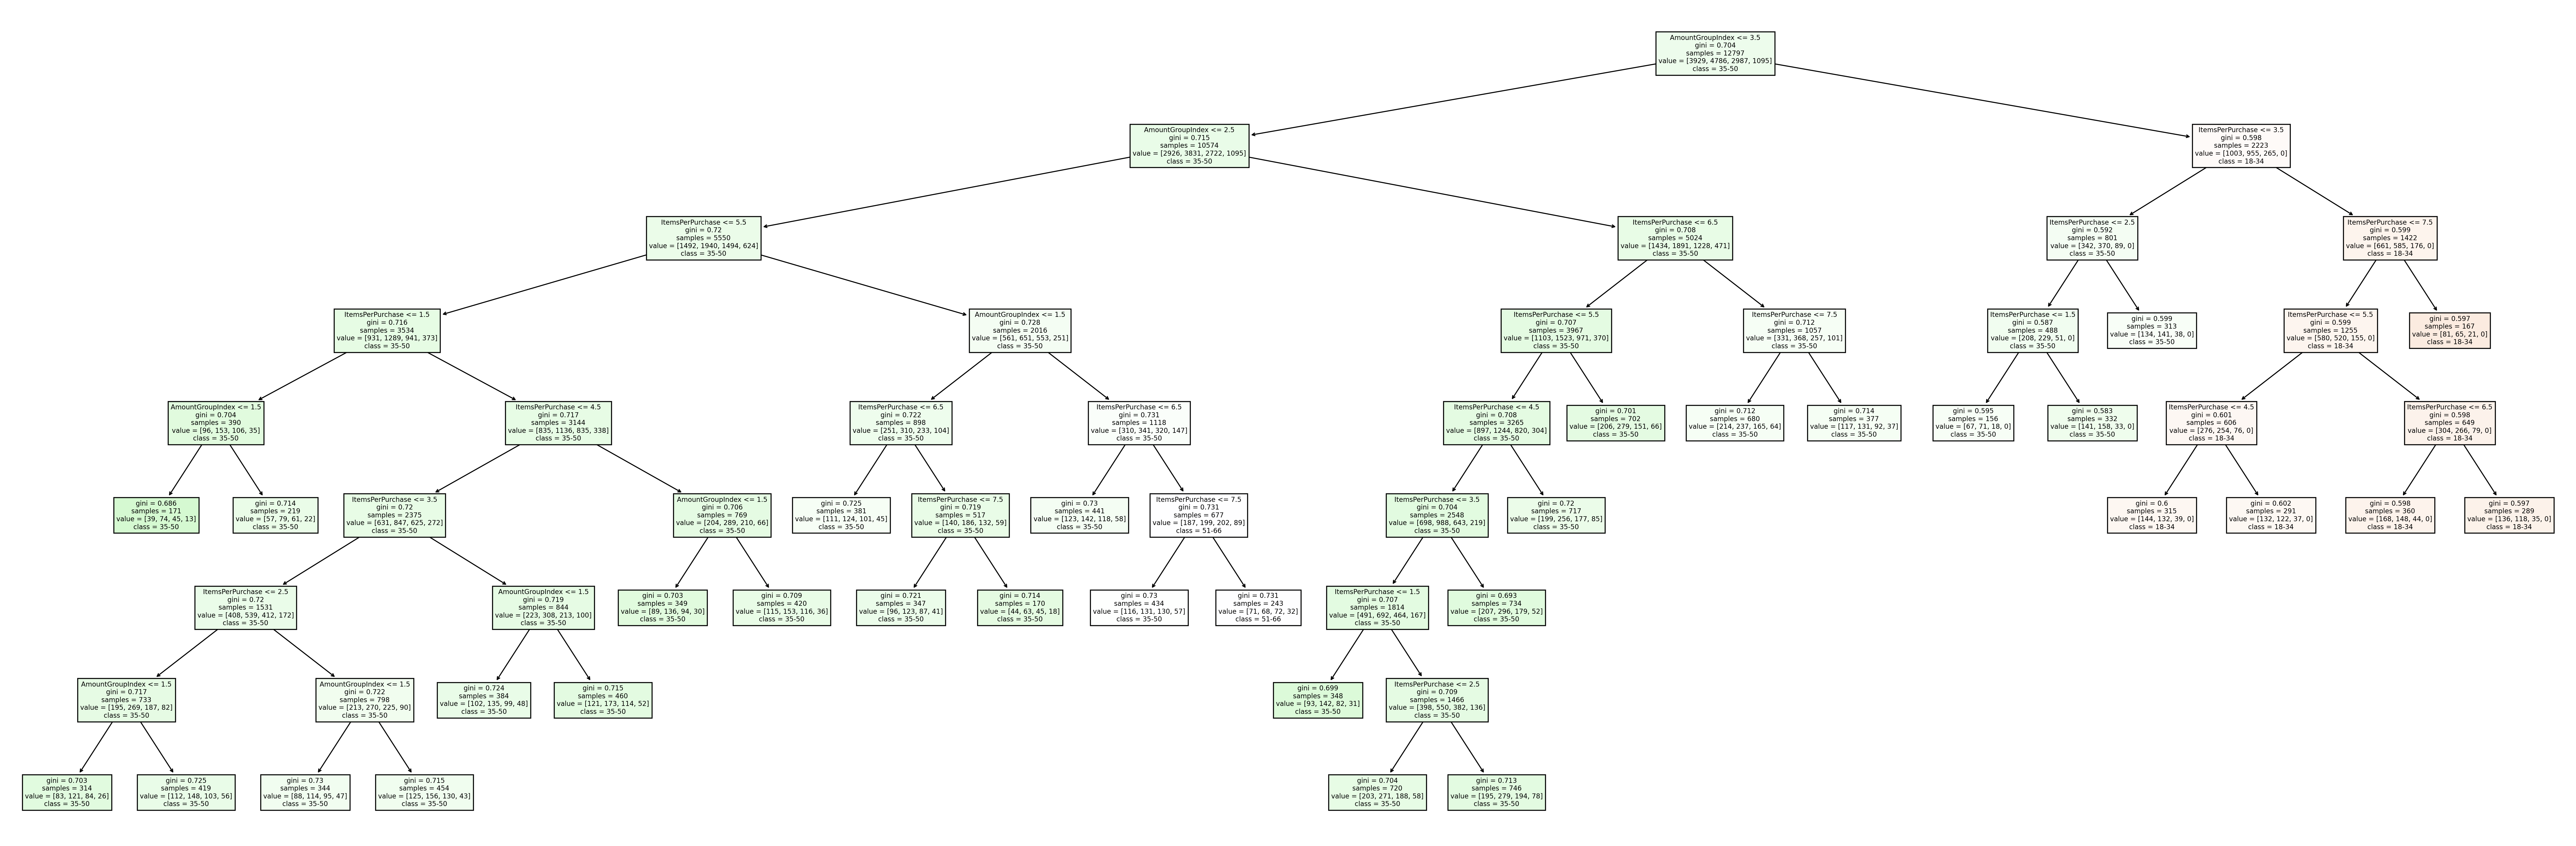

In [ ]:
print('North Region (Decision Tree Classifier)')
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(modeln, feature_names=XN.columns, class_names=['18-34','35-50','51-66','67-85'], filled=True)

South Region (Decision Tree Classifier)


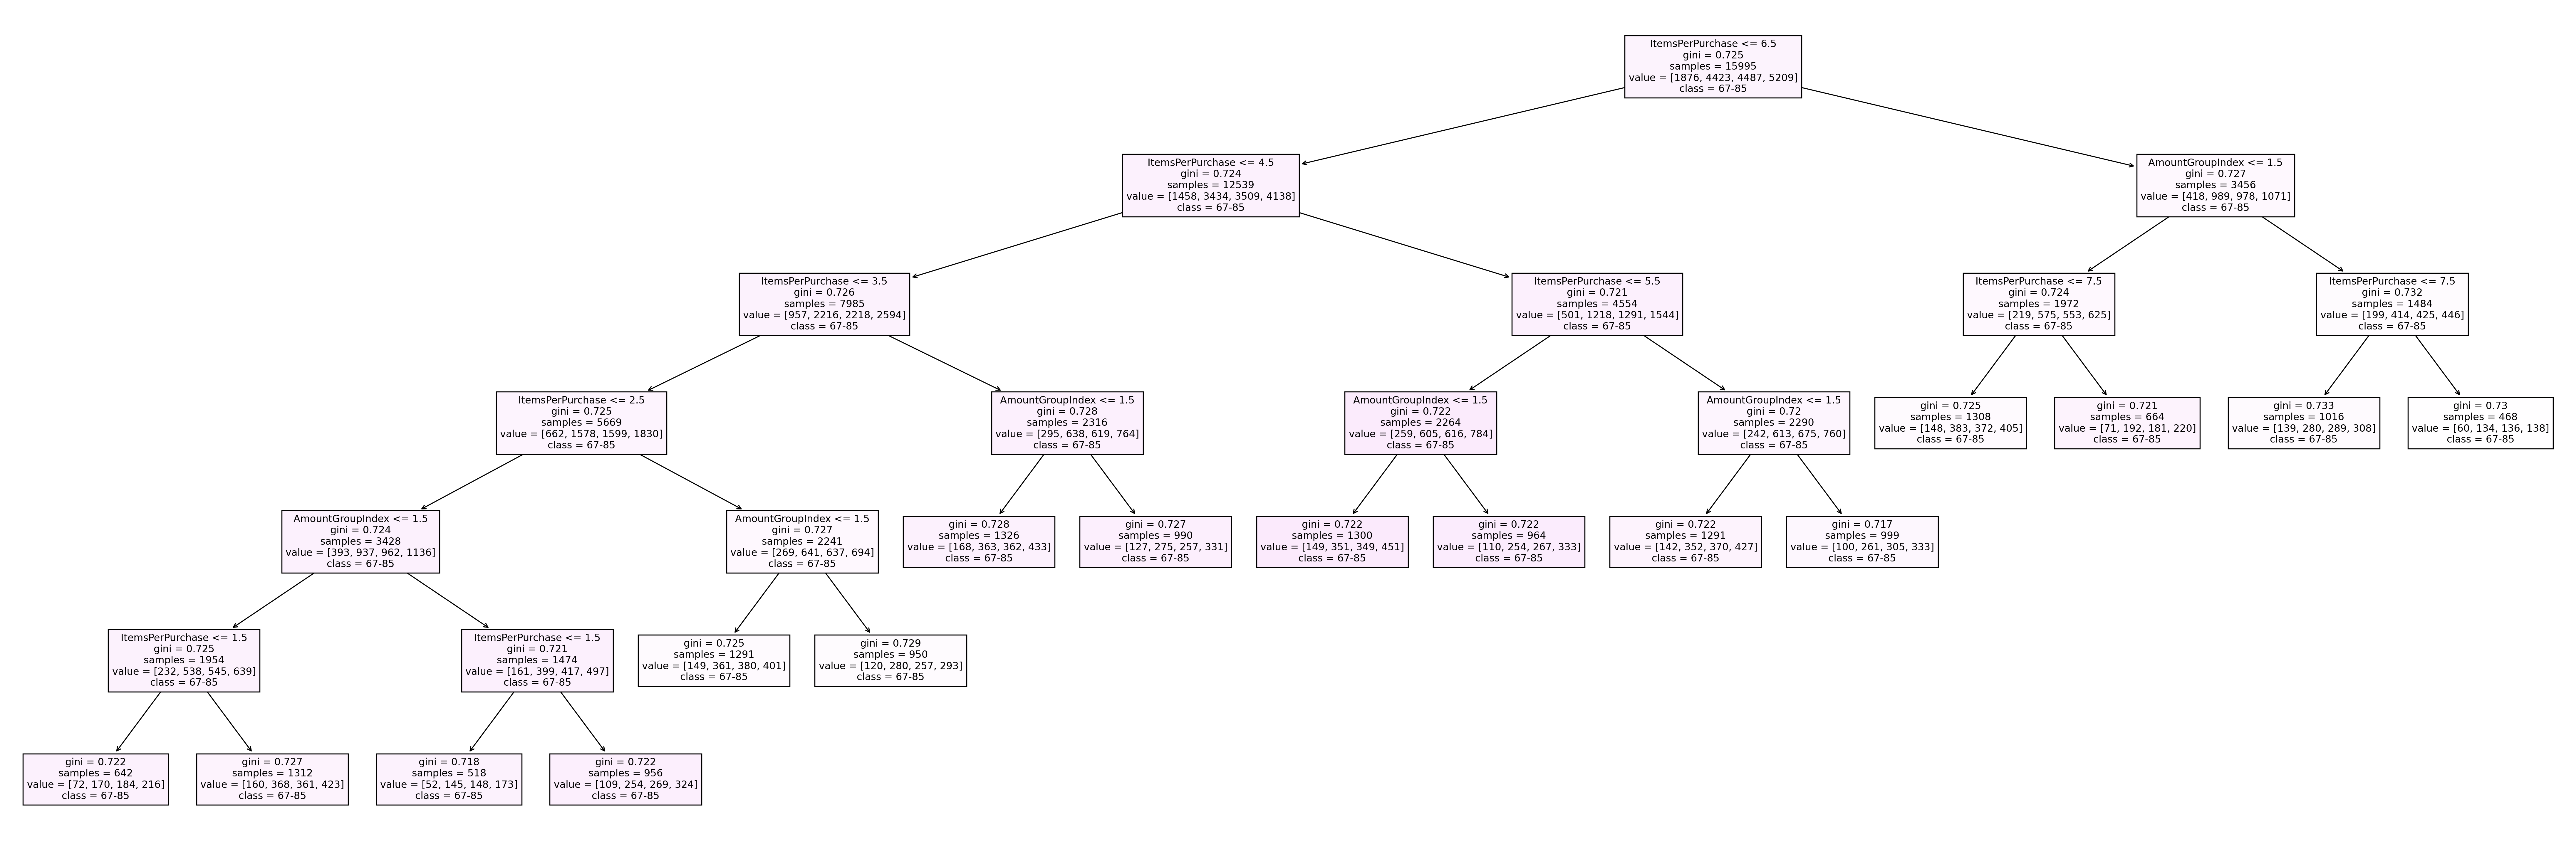

In [ ]:
print('South Region (Decision Tree Classifier)')
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(models, feature_names=XS.columns, class_names=['18-34','35-50','51-66','67-85'], filled=True)

East Region (Decision Tree Classifier)


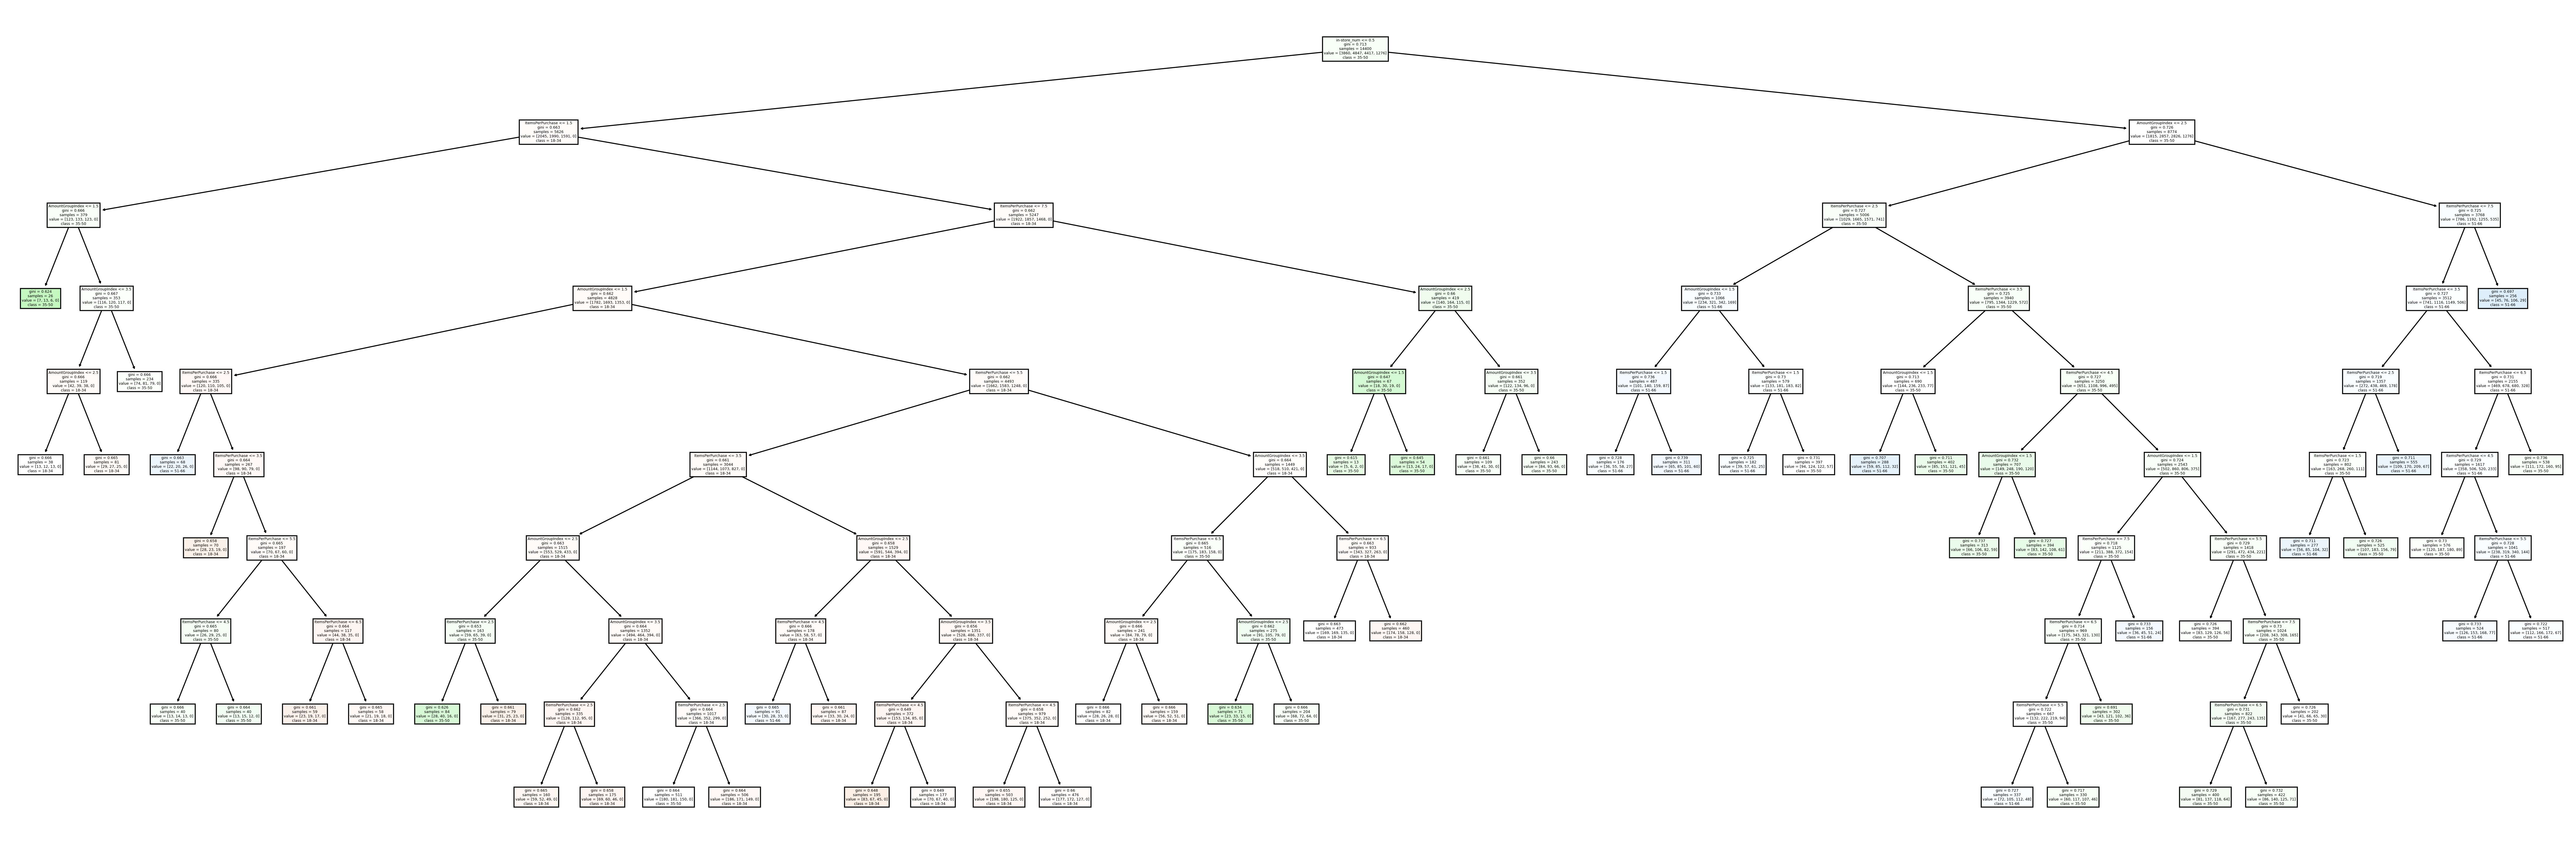

In [ ]:
print('East Region (Decision Tree Classifier)')
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(modele, feature_names=XE.columns, class_names=['18-34','35-50','51-66','67-85'], filled=True)

West Region (Decision Tree Classifier)


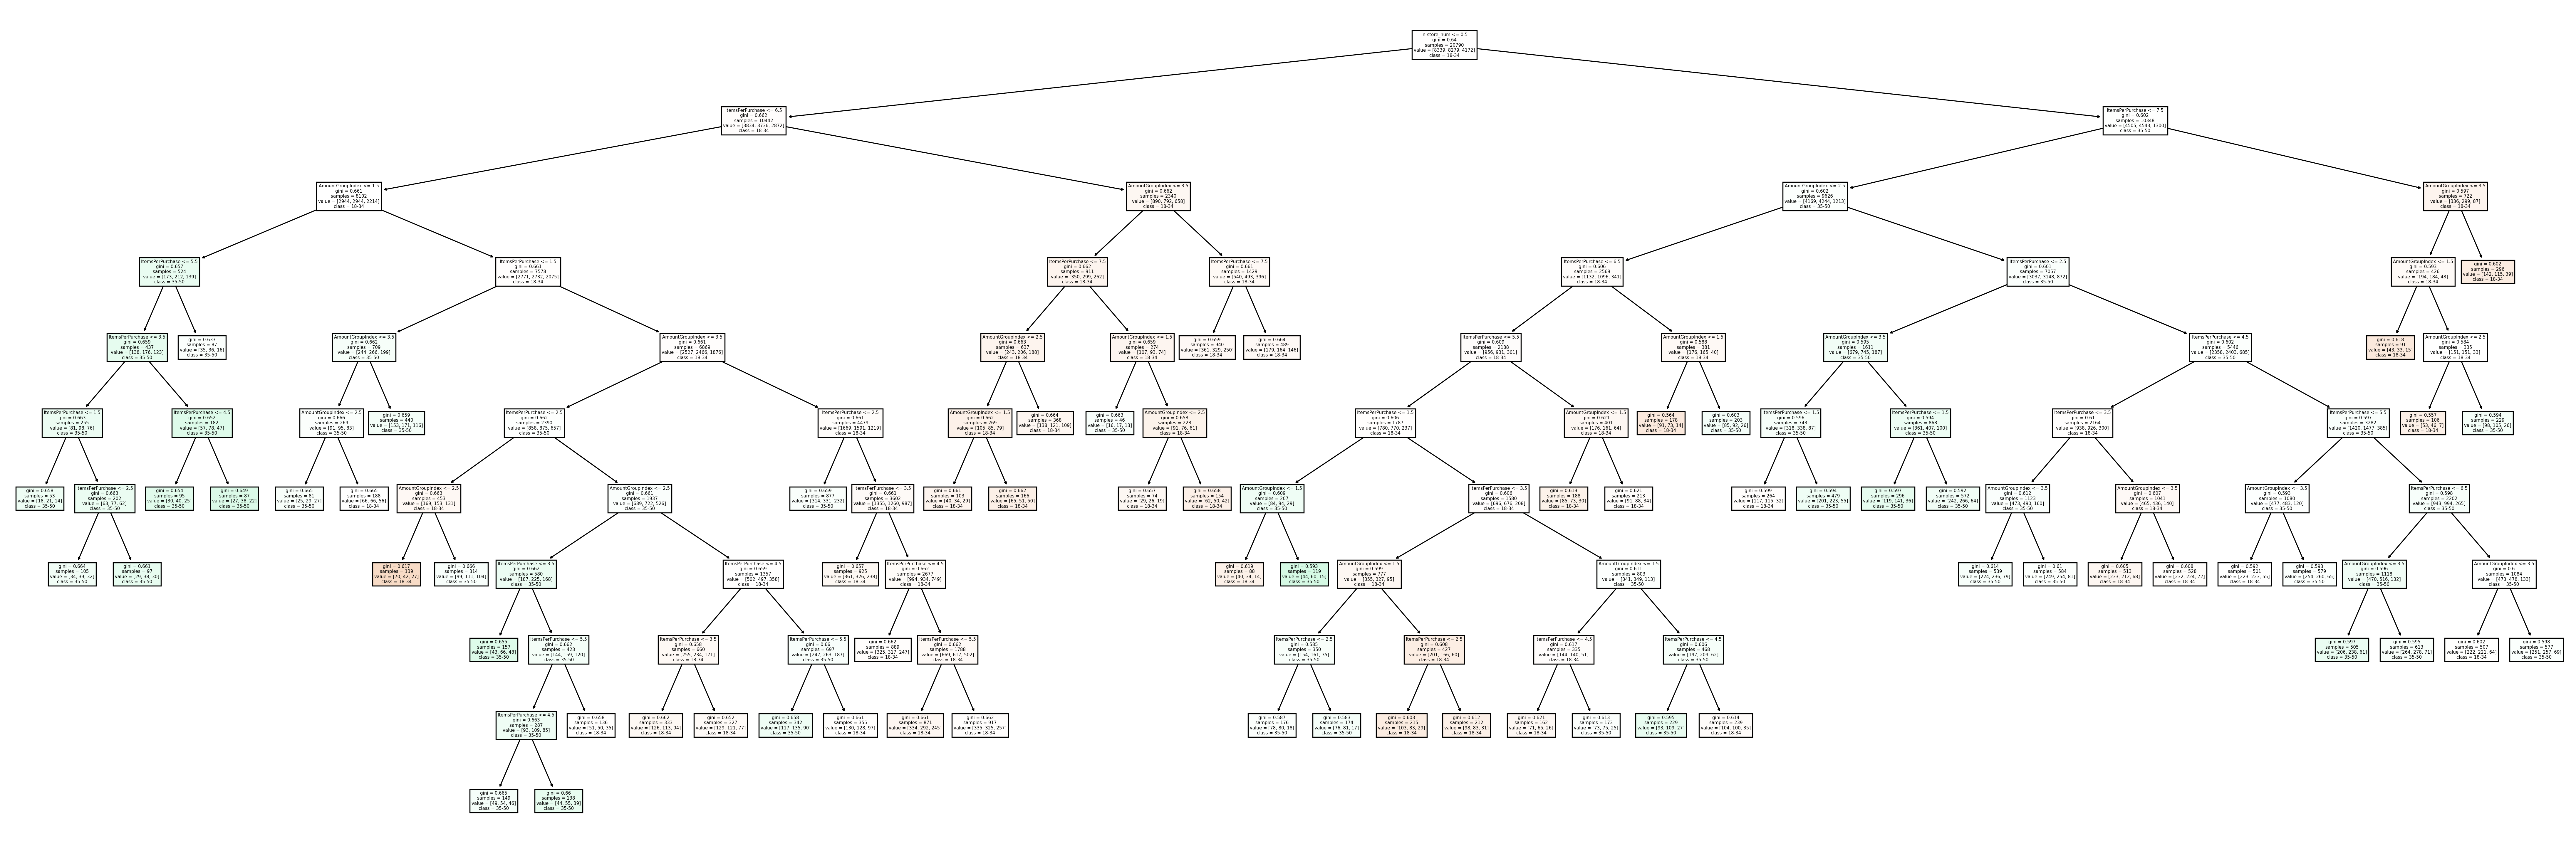

In [ ]:
print('West Region (Decision Tree Classifier)')
fig = plt.figure(figsize=(45,15),dpi=250)
tree = plot_tree(modelw, feature_names=XW.columns, class_names=['18-34','35-50','51-66','67-85'], filled=True)

Overall, it does not appear that we can predict the age of the customer either by region or other demographic data.

# Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?

In [ ]:
# Correlation matrix
data.corr()

in-store_num  region_num       Age  AgeGroupIndex  \
in-store_num           1.000000   -0.133171 -0.178180      -0.161989   
region_num            -0.133171    1.000000 -0.235370      -0.215392   
Age                   -0.178180   -0.235370  1.000000       0.955242   
AgeGroupIndex         -0.161989   -0.215392  0.955242       1.000000   
ItemsPerPurchase      -0.003897   -0.001904  0.000657       0.000271   
AmountGroupIndex       0.086125    0.374382 -0.311260      -0.284779   
AmountPerPurchase     -0.085573    0.403486 -0.282033      -0.257142   
AmountPerItem         -0.054597    0.269473 -0.187250      -0.169467   

                   ItemsPerPurchase  AmountGroupIndex  AmountPerPurchase  \
in-store_num              -0.003897          0.086125          -0.085573   
region_num                -0.001904          0.374382           0.403486   
Age                        0.000657         -0.311260          -0.282033   
AgeGroupIndex              0.000271         -0.284779          -0.257142   
ItemsPerPurchase           1.000000          0.000010           0.000384   
AmountGroupIndex           0.000010          1.000000           0.886375   
AmountPerPurchase          0.000384          0.886375           1.000000   
AmountPerItem             -0.469113          0.591212           0.666868   

                   AmountPerItem  
in-store_num           -0.054597  
region_num              0.269473  
Age                    -0.187250  
AgeGroupIndex          -0.169467  
ItemsPerPurchase       -0.469113  
AmountGroupIndex        0.591212  
AmountPerPurchase       0.666868  
AmountPerItem           1.000000

In [ ]:
# Covariance matrix
data.cov()

in-store_num  region_num          Age  AgeGroupIndex  \
in-store_num           0.250003   -0.075019    -1.400071      -0.079417   
region_num            -0.075019    1.269321    -4.167305      -0.237942   
Age                   -1.400071   -4.167305   246.966189      14.719289   
AgeGroupIndex         -0.079417   -0.237942    14.719289       0.961411   
ItemsPerPurchase      -0.004017   -0.004421     0.021270       0.000548   
AmountGroupIndex       0.048179    0.471906    -5.472632      -0.312404   
AmountPerPurchase    -30.860425  327.874873 -3196.782841    -181.853827   
AmountPerItem         -9.055034  100.704285  -976.086565     -55.117177   

                   ItemsPerPurchase  AmountGroupIndex  AmountPerPurchase  \
in-store_num              -0.004017          0.048179         -30.860425   
region_num                -0.004421          0.471906         327.874873   
Age                        0.021270         -5.472632       -3196.782841   
AgeGroupIndex              0.000548         -0.312404        -181.853827   
ItemsPerPurchase           4.248751          0.000023           0.570791   
AmountGroupIndex           0.000023          1.251726         715.263463   
AmountPerPurchase          0.570791        715.263463      520221.252295   
AmountPerItem           -320.741257        219.404313      159544.065150   

                   AmountPerItem  
in-store_num           -9.055034  
region_num            100.704285  
Age                  -976.086565  
AgeGroupIndex         -55.117177  
ItemsPerPurchase     -320.741257  
AmountGroupIndex      219.404313  
AmountPerPurchase  159544.065150  
AmountPerItem      110025.586244

In the two above charts, we see that there is a relationship between age and amount, both in the correlation of -0.235358 and the covariance of -3195.704601. It would appear that as age increases, the amount purchased decreases.

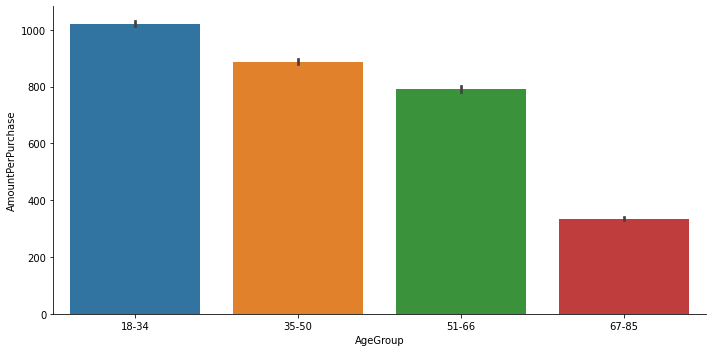

In [ ]:
#factorplot of transactions grouped by region and age range.
sns.catplot(x='AgeGroup', y='AmountPerPurchase', data=data, kind='bar', 
            order = ['18-34','35-50','51-66','67-85'], aspect=2)

In the above chart, we see that the amount purchased decreases as the age bracket increases

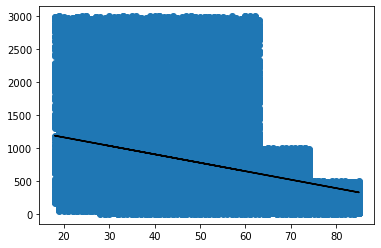

In [ ]:
# creating a scatter plot of 50000 observations from the dataframe
data_sample = data.sample(50000)

x = data_sample['Age']
y = data_sample['AmountPerPurchase']

plt.scatter(x,y,marker='o')

# creating m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# scatter plot with linear regression line
plt.plot(x, m*x+b, color='black')

In the above scatter plot, a linear regression line is displayed showing that as the age increases, the amount decreases.